Import packages

In [0]:
import pandas as pd
from google.colab import files
from sklearn import svm, linear_model, preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import io
import matplotlib.pyplot as plt
import numpy as np

Load and organize  the data

In [9]:
DataFile = files.upload()
Data_df = pd.read_csv(io.StringIO(DataFile['Data.csv'].decode('utf-8')))
Data_df = shuffle(Data_df)
Data_df = pd.read_csv(io.StringIO(DataFile['Data.csv'].decode('utf-8')))
Data_df = shuffle(Data_df)
X = preprocessing.scale(Data_df.loc[:,'R1D':'Money'])
Y = Data_df.loc[:,'Label']
X_train = X[0:1400]
X_test = X[1400: 1599]
Y_train = Y[0:1400]
Y_test = Y[1400: 1599]

Saving Data.csv to Data (1).csv


# 1. Multi-class logistic regression:

*Use one-vs-rest strategy for multi-class classification.*

1.1 Use 5-fold cross validation to choose panelty parameter C

In [0]:
LogRegAccuracies = []
different_Cs = np.arange(0.1,5,0.1)
for c in different_Cs:
  LogReg = linear_model.LogisticRegression(C=c, max_iter = 200)
  scores = cross_val_score(LogReg, X_train, Y_train, cv=5)
  accuracy = scores.mean()
  LogRegAccuracies.append(accuracy)

Best C: 1.6, best accuracy: 0.678534638175052


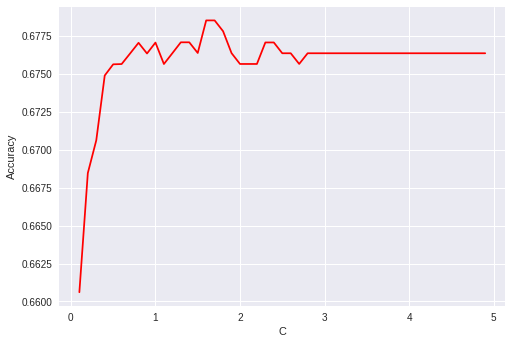

In [493]:
Best_C = different_Cs[np.argmax(LogRegAccuracies)]
print("Best C: " + str(Best_C) + ', ' + 'best accuracy: ' + str(max(LogRegAccuracies)))
plt.plot(different_Cs, LogRegAccuracies, 'r-')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

1.2 Train on the whole training data set using best C, and then use the test set to evaluate

In [491]:
LogReg = linear_model.LogisticRegression(C=Best_C, max_iter=200)
LogReg.fit(X_train, Y_train)
LogReg_Accuracy = LogReg.score(X_test, Y_test)
print(LogReg_Accuracy)

0.6733668341708543


# 2. Multi-class Support Vector Machine:



*Use one-vs-rest strategy for multi-class classification. Use radial basis function kernel (Gaussian kernel).*

2.1 Use 5-fold cross validation to choose panelty parameter C

In [0]:
SVMAccuracies = []
different_Cs = np.arange(0.1,5,0.1)
for c in different_Cs:
  SVM = svm.SVC(C=c)
  scores = cross_val_score(SVM, X[0:1000], Y[0:1000], cv=5)
  accuracy = scores.mean()
  SVMAccuracies.append(accuracy)

Best C: 1.0, best accuracy: 0.665018403539795


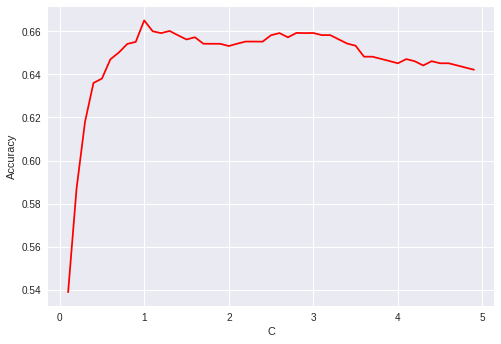

In [496]:
Best_C = different_Cs[np.argmax(SVMAccuracies)]
print("Best C: " + str(Best_C) + ', ' + 'best accuracy: ' + str(max(SVMAccuracies)))
plt.plot(different_Cs, SVMAccuracies, 'r-')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

2.2 Train on the whole training data set using best C, and then use the test set to evaluate

In [497]:
SVM = svm.SVC(C=Best_C)
SVM.fit(X_train, Y_train)
SVM_Accuracy = SVM.score(X_test, Y_test)
print(SVM_Accuracy)

0.6331658291457286


# 3. Neural Network

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
NeuralNetwork = keras.Sequential([
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

NeuralNetwork.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
Y_train_modified = Y_train - 1
Y_test_modified = Y_test - 1
history = NeuralNetwork.fit(X_train, Y_train_modified.values, epochs=200, validation_data=(X_test, Y_test_modified), verbose=0)

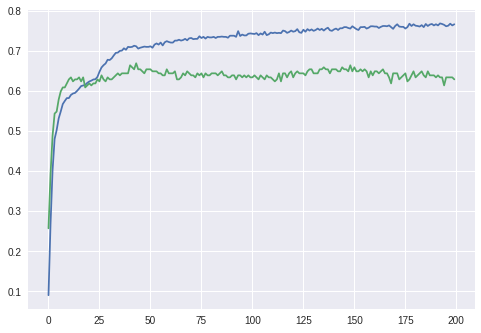

In [86]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

In [87]:
test_loss, test_acc = NeuralNetwork.evaluate(X_test, Y_test_modified)
print('Test accuracy:', test_acc)

199/199 [==============================] - 0s 70us/step
Test accuracy: 0.6281407044161504
